## Exercise - ICP11 Autoencoder

Copy the autoencoder tutorial #1. 

Update this model so that the bottleneck is only six neurons. 

Investigate how well this model performs. Does it still do a good job? Add comments to your notebook to describe your results. Also, comment on what the problem may be if you instead increased the bottleneck to 100 neurons.

Submit your notebook (ipynb file).

## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recreate hand written digits. Then, we will use the autoencoder to generate new digits to see how well it performs. Finally, we will use the autoencoder to generate a new symbol that is not in the training se (and see that it does a poor job at doing this).

In [28]:
import numpy as np
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import tensorflow as tf
from tensorflow.keras.preprocessing import image
#np.random.seed(1)


### Load and normalize our data

In [29]:
# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


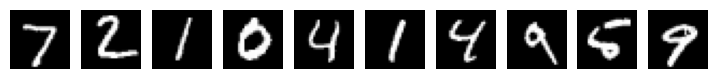

In [30]:
n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model.

In [31]:
input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 500)               392500    
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 dense_26 (Dense)            (None, 100)               30100     
                                                                 
 dense_27 (Dense)            (None, 6)                 606       
                                                                 
 dense_28 (Dense)            (None, 100)               700       
                                                                 
 dense_29 (Dense)            (None, 300)               30300     
                                                                 
 dense_30 (Dense)            (None, 500)              

### Train the autoencoder model.

In [32]:
# Train the autoencoder with MNIST data

# NOTE: This is our first example of using callbacks. Callbacks are functions that can be applied during training. In this case,
# we are using EarlyStopping, which will stop training if there is no improvement in the loss after a certain number of epochs.

early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1) # if there is no improvement in 3 epochs, stop training

history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop] # this is the callback; notice it's in a list. You can have multiple callbacks.
)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2244 - val_loss: 0.1847
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1710 - val_loss: 0.1615
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1545 - val_loss: 0.1485
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1457 - val_loss: 0.1433
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1417 - val_loss: 0.1402
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1390 - val_loss: 0.1383
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1369 - val_loss: 0.1362
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1351 - val_loss: 0.1349
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1336 - val_loss: 0.1340
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1323 - val_loss: 0.132

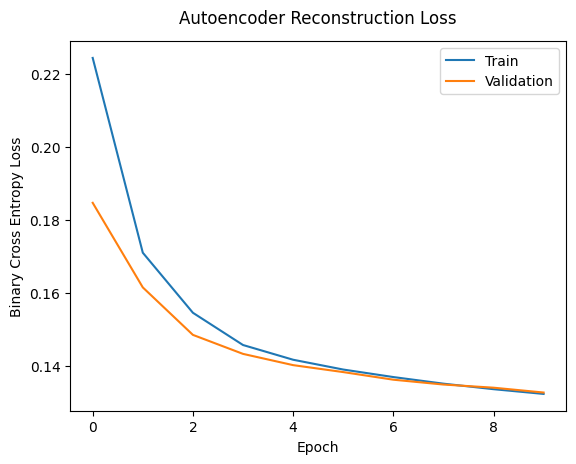

In [33]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 1s 2ms/step


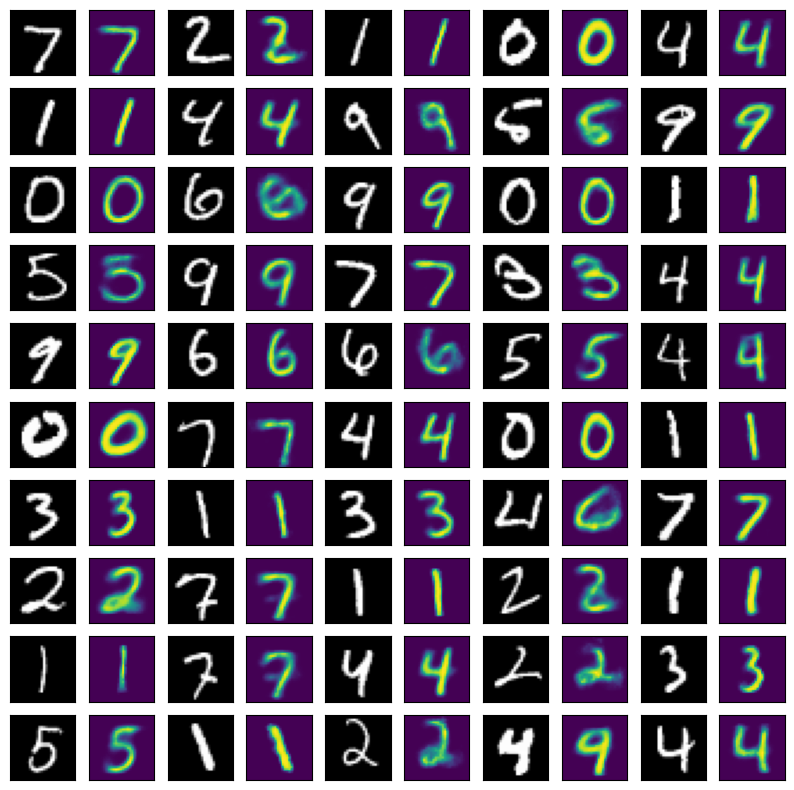

In [34]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [35]:
autoencoder.save('initially_trained_autoencoder.tf', save_format='tf')

INFO:tensorflow:Assets written to: initially_trained_autoencoder.tf/assets


INFO:tensorflow:Assets written to: initially_trained_autoencoder.tf/assets


But what happens if we sent it something it hasn't been trained on? Let’s try it out:

1/1 [==============================] - 0s 12ms/step
(1, 784)


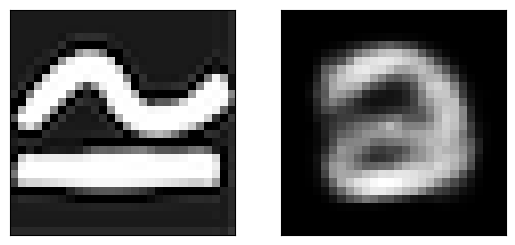

In [36]:
####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")

####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)

#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary

Since the new image wasn't part of the original training dataset, it's seen as an 'anomoly' by the autoencoder. This is indicated by the difference (error) betweem the original image and the reconstructed image.

## Conclusion

In this notebook, I have updated the bottleneck with 6 neurons in place of 16.

From the model training, I can see that the training loss and validation loss is higher with 6 neurons bottleneck compared to the 16 neuron bottleneck. This can be due to the less number of neurons trying to capture the same data complexity.

But from the over all training cycle, I can say that there is consistent decrease in the loss for both training set and validation set which indicates that model is learning and generalizing well to the data by the end of the 10th epoch.

From the observations, I can say that while the model is able to generalize most of the images, there is a decrease in the accuracy to generalize some of the images. This is reflected in some of the images for the numbers - two and four, where the model incorrrecly recreated '4' as '6' & '9' and there seems to be an error in recreating the '2' in one of the images.

If we increase the number of neurons to 100 in the bottleneck, this could lead to detailed and faithful reconstructions of the original images. This has the potential risk of overfitting where the autoencoder becomes too specialized in the training data and fails to generalize well to new, unseen data.
